# Running a quick analysis with Python on a dataset

In [1]:
# Import basic packages
import pandas as pd
import numpy as np

## Load the data

In [2]:
data_df = pd.read_csv("winter_2024_data.csv")

In [3]:
data_df

,price,appraisal_offer,make_appraisal,model_appraisal,trim_level_appraisal,model_year_appraisal,mileage_appraisal,engine_appraisal,cylinders_appraisal,mpg_city_appraisal,...,cylinders,mpg_city,mpg_highway,horsepower,fuel_capacity,vehicle_type,color,online_appraisal_flag,state,days_since_offer
0,19500,18800,Kia,Sportage,Not Premium,2014,19300,2.4L,4,21.0,...,3,24.0,34.0,134,16,Small SUV,Gray,0.0,CA,0
1,24000,9000,Ford,Escape,Premium,2012,39300,1.6L,4,22.0,...,6,19.0,27.0,271,15,Small SUV,Black,0.0,IL,0
2,24000,9800,Dodge,Challenger,Not Premium,2013,106100,3.6L,6,19.0,...,4,NaN,NaN,248,12,Luxury,White,0.0,CA,0
3,33000,14600,Toyota,Tacoma,Premium,2014,105800,3.5L,6,19.0,...,6,18.0,24.0,380,16,Medium SUV,Black,1.0,CA,1
4,14200,19500,Jeep,Cherokee,Not Premium,2015,20400,2.4L,4,22.0,...,4,NaN,NaN,188,14,Small SUV,Gold,0.0,FL,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132712,16500,3400,Hyundai,Elantra,Premium,2010,97800,1.8L,4,28.0,...,4,22.0,32.0,228,16,Small SUV,White,0.0,CA,0
132713,20200,10500,Honda,Civic,Not Premium,2012,40300,2.0L,4,31.0,...,4,22.0,31.0,228,16,Small SUV,Black,0.0,CA,0
132714,21700,5300,Mercedes-Benz,ML350,NaN,2004,75800,3.5L,6,15.0,...,4,22.0,31.0,228,16,Small SUV,Black,0.0,CA,0
132715,21700,8300,Kia,Forte,Not Premium,2013,47300,2.0L,4,29.0,...,4,22.0,31.0,228,16,Small SUV,White,0.0,CA,0


## Do basic cleaning of the data

This should happen alongside or after data exploration. Showing it separately for clarity and ease of use

In [4]:
# get rows that have any null values in any column
null_data = data_df[data_df.isnull().any(axis=1)]
null_data

,price,appraisal_offer,make_appraisal,model_appraisal,trim_level_appraisal,model_year_appraisal,mileage_appraisal,engine_appraisal,cylinders_appraisal,mpg_city_appraisal,...,cylinders,mpg_city,mpg_highway,horsepower,fuel_capacity,vehicle_type,color,online_appraisal_flag,state,days_since_offer
0,19500,18800,Kia,Sportage,Not Premium,2014,19300,2.4L,4,21.0,...,3,24.0,34.0,134,16,Small SUV,Gray,0.0,CA,0
2,24000,9800,Dodge,Challenger,Not Premium,2013,106100,3.6L,6,19.0,...,4,NaN,NaN,248,12,Luxury,White,0.0,CA,0
4,14200,19500,Jeep,Cherokee,Not Premium,2015,20400,2.4L,4,22.0,...,4,NaN,NaN,188,14,Small SUV,Gold,0.0,FL,0
5,17200,900,Chevrolet,Aveo,Not Premium,2005,114300,1.6L,4,27.0,...,3,24.0,33.0,134,16,Small SUV,Black,0.0,CA,0
9,26200,7500,Mazda,Mazda6,Not Premium,2010,93900,2.5L,4,26.0,...,4,NaN,NaN,248,12,Luxury,White,0.0,NV,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132685,21000,13500,Mercedes-Benz,CLA250,NaN,2010,37000,2.0L,4,26.0,...,4,22.0,31.0,228,16,Small SUV,White,1.0,TX,1
132694,15000,13200,Toyota,RAV4,Not Premium,2014,54400,2.5L,4,22.0,...,4,21.0,28.0,240,17,Small SUV,Red,NaN,MD,5
132701,24700,15800,Subaru,Impreza,NaN,2015,13100,2.0L,4,28.0,...,4,22.0,31.0,228,16,Small SUV,White,0.0,CA,0
132702,21000,7500,Hyundai,Santa Fe Sport,NaN,2011,78900,2.4L,4,19.0,...,4,21.0,28.0,240,17,Small SUV,Black,0.0,IL,0


If you spend time to look at the data, you will find some weirdness about some of the columns! Need to adjust for these.

Namely:
* Leading and trailing whitespaces
* Engine size has text in it (should be a numerical column)
* Null data

We will also want to make some new columns for later that combine the `make` and `model` information

Python gives some nice tools to quickly clean these up! (Copilot, ChatGPT, etc. work well on these problems)

In [5]:
def data_clean(df):
    """Remove any excess whitespace"""
    new_df = df.copy()
    for col in new_df.columns:
        try:
            new_df[col] = new_df[col].str.strip()
        except AttributeError:
            continue
    return new_df

In [6]:
def clean_engine(engine):
    """Remove 'L' from engine, to make it a number"""
    engine_clean = float(engine.strip('L'))
    return engine_clean

In [7]:
data_df['clean_engine_appraisal'] = data_df['engine_appraisal'].apply(clean_engine)
data_df['clean_engine'] = data_df['engine'].apply(clean_engine)

data_df['trim_level_appraisal'].fillna('Unknown Trim', inplace=True)
data_df = data_df.dropna(subset=['fuel_capacity_appraisal'])


clean_df = data_df.copy()

clean_df = clean_df.drop(columns=['engine_appraisal', 'engine'])

clean_df = data_clean(clean_df)

Add a make model column

In [8]:
clean_df['make_model_appraisal'] = clean_df['make_appraisal'] + ' ' + clean_df['model_appraisal']
clean_df['make_model'] = clean_df['make'] + ' ' + clean_df['model']

There is also complexity for MPG data, handle that here as well

In [9]:
clean_df['unknown_mpg_city_flag'] = clean_df['mpg_city'].apply(lambda x: 1 if pd.isna(x) else 0)

clean_df['mpg_city'] = clean_df.groupby(['make', 'model'])['mpg_city'].transform(lambda x: x.fillna(x.mean()))
clean_df['mpg_city_appraisal'] = clean_df.groupby(['make', 'model'])['mpg_city_appraisal'].transform(lambda x: x.fillna(x.mean()))



# If still can't fill, use vehicle type
clean_df['mpg_city'] = clean_df.groupby(['vehicle_type'])['mpg_city'].transform(lambda x: x.fillna(x.mean()))
clean_df['mpg_city_appraisal'] = clean_df.groupby(['vehicle_type'])['mpg_city_appraisal'].transform(lambda x: x.fillna(x.mean()))

In [10]:
clean_df['unknown_mpg_highway_flag'] = clean_df['mpg_highway'].apply(lambda x: 1 if pd.isna(x) else 0)

clean_df['mpg_highway'] = clean_df.groupby(['make', 'model'])['mpg_highway'].transform(lambda x: x.fillna(x.mean()))

# If still can't fill, use vehicle type
clean_df['mpg_highway'] = clean_df.groupby(['vehicle_type'])['mpg_highway'].transform(lambda x: x.fillna(x.mean()))

Update for null trim levels

In [11]:
clean_df['trim_level_appraisal'].fillna('Unknown Trim', inplace=True)
clean_df['trim_level'].fillna('Unknown Trim', inplace=True)

In [12]:
# Fill online appraisal flag with 0
clean_df['online_appraisal_flag'].fillna(0, inplace=True)

## Data engineering / Cleaning

Let's add in a flag for hybrid vehicles

In [13]:
def hybrid_flag(model_code):
    """flag 'hybr' since some data is truncated. Can be written more elegantly, but this is readable."""
    if 'hybr' in model_code.lower():
        return 1
    if 'prius' in model_code.lower():
        return 1
    if 'clarity' in model_code.lower():
        return 1
    if 'volt' in model_code.lower():
        return 1
    if 'energy' in model_code.lower():
        return 1
    if 'plug' in model_code.lower() and 'in' in model_code.lower():
        return 1
    return 0

In [14]:
def plug_in_hybrid_flag(model_code):
    if 'plug' in model_code.lower() and 'in' in model_code.lower():
        return 1
    if 'prime' in model_code.lower():
        return 1
    return 0

In [15]:
clean_df['hybrid_flag_appraisal'] = clean_df['model_appraisal'].apply(hybrid_flag)
clean_df['hybrid_flag'] = clean_df['model'].apply(hybrid_flag)

clean_df['plug_in_flag_appraisal'] = clean_df['model_appraisal'].apply(plug_in_hybrid_flag)
clean_df['plug_in_flag'] = clean_df['model'].apply(plug_in_hybrid_flag)

## Start looking at data

In [16]:
numerical_cols = clean_df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [17]:
clean_df[numerical_cols].describe()

,price,appraisal_offer,model_year_appraisal,mileage_appraisal,cylinders_appraisal,mpg_city_appraisal,mpg_highway_appraisal,horsepower_appraisal,fuel_capacity_appraisal,model_year,...,online_appraisal_flag,days_since_offer,clean_engine_appraisal,clean_engine,unknown_mpg_city_flag,unknown_mpg_highway_flag,hybrid_flag_appraisal,hybrid_flag,plug_in_flag_appraisal,plug_in_flag
count,132606.000000,132606.000000,132606.000000,132606.000000,132606.000000,132606.000000,132606.000000,132606.000000,132606.000000,132606.000000,...,132606.000000,132606.000000,132606.000000,132606.000000,132606.000000,132606.000000,132606.000000,132606.000000,132606.000000,132606.000000
mean,21899.837111,8768.681658,2010.052931,80695.410464,4.918028,22.265613,30.139964,215.479202,17.367811,2014.187789,...,0.315204,1.279859,2.788110,2.802635,0.006576,0.006734,0.012624,0.018302,0.000136,0.003062
std,6957.792934,7148.988376,3.930534,43875.541506,1.281469,5.435474,6.153668,73.332467,4.380204,1.889284,...,0.464599,2.303500,1.060324,1.115931,0.080825,0.081786,0.111645,0.134043,0.011650,0.055248
min,3700.000000,0.000000,1992.000000,0.000000,3.000000,10.000000,13.000000,70.000000,7.000000,2005.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16500.000000,3000.000000,2008.000000,47100.000000,4.000000,18.000000,25.000000,161.000000,14.000000,2013.000000,...,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,21000.000000,7100.000000,2011.000000,75000.000000,4.000000,22.000000,30.000000,185.000000,17.000000,2014.000000,...,0.000000,0.000000,2.500000,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,26200.000000,12800.000000,2013.000000,106600.000000,6.000000,26.000000,35.000000,278.000000,19.000000,2015.000000,...,1.000000,1.000000,3.500000,3.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,95200.000000,69800.000000,2019.000000,482500.000000,8.000000,60.000000,59.000000,702.000000,38.000000,2019.000000,...,1.000000,7.000000,7.000000,7.300000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Can also look at this data graphically!

There are many good plotting libraries in python. Personally, I like seaborn (built on matplotlib) or plotly for clarity, showing statistical errors, and ease of use

In [18]:
import seaborn as sns

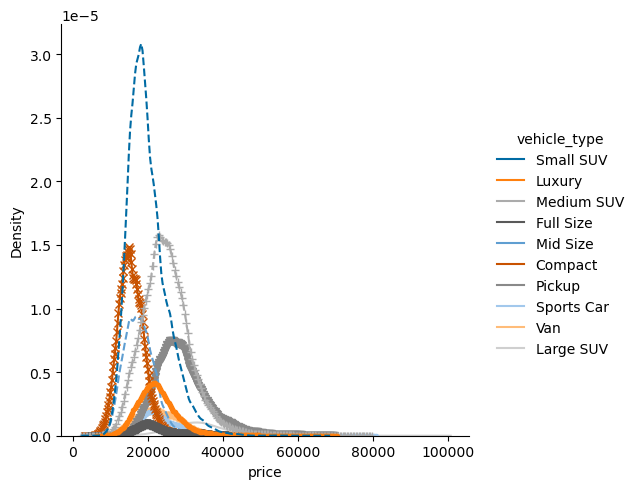

In [19]:
sns.displot(clean_df, x='price', hue='vehicle_type', kind='kde')

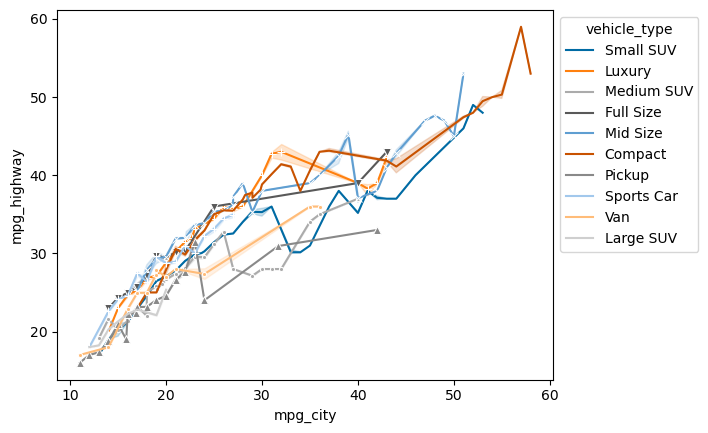

In [20]:
sns.lineplot(clean_df, x='mpg_city', y='mpg_highway', hue='vehicle_type')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='vehicle_type')

## Question: When an appraisal customer buys a car from carmax, how often are some features the same?

In [21]:
dup_cols = []
for col in clean_df.columns:
    if f'{col}_appraisal' in clean_df.columns:
        dup_cols.append(col)

In [22]:
dup_cols

['make',
 'model',
 'trim_level',
 'model_year',
 'mileage',
 'cylinders',
 'mpg_city',
 'mpg_highway',
 'horsepower',
 'fuel_capacity',
 'vehicle_type',
 'color',
 'clean_engine',
 'make_model',
 'hybrid_flag',
 'plug_in_flag']

In [23]:
for col in dup_cols:
    clean_df[f'{col}_same_flag'] = clean_df[col] == clean_df[f'{col}_appraisal']

In [24]:
clean_df[[f'{col}_same_flag' for col in dup_cols]].agg(['mean', 'sem',])

,make_same_flag,model_same_flag,trim_level_same_flag,model_year_same_flag,mileage_same_flag,cylinders_same_flag,mpg_city_same_flag,mpg_highway_same_flag,horsepower_same_flag,fuel_capacity_same_flag,vehicle_type_same_flag,color_same_flag,clean_engine_same_flag,make_model_same_flag,hybrid_flag_same_flag,plug_in_flag_same_flag
mean,0.198204,0.080057,0.480936,0.076799,0.000845,0.577742,0.085343,0.070336,0.037336,0.138327,0.312226,0.225389,0.159148,0.080057,0.973644,0.996818
sem,0.001095,0.000745,0.001372,0.000731,0.000080,0.001356,0.000767,0.000702,0.000521,0.000948,0.001273,0.001147,0.001005,0.000745,0.000440,0.000155


Hybrids and plug ins are **very** strong predictors of the kind of car that will be purchased after an appraisal!

### Takeaway: We should make sure to priorize showing hybrid cars to customers selling their own!

It is also very easy to dig down one level deeper to see more detailed data. Are there nuances to this fact?

In [25]:
clean_df.groupby('vehicle_type')[[f'{col}_same_flag' for col in dup_cols]].agg(['mean', 'sem',])

make_same_flag           model_same_flag            \
                       mean       sem            mean       sem   
vehicle_type                                                      
Compact            0.195127  0.003165        0.098616  0.002381   
Full Size          0.267881  0.011508        0.120783  0.008468   
Large SUV          0.208931  0.008230        0.077837  0.005424   
Luxury             0.086298  0.003547        0.030627  0.002176   
Medium SUV         0.205043  0.002329        0.069822  0.001470   
Mid Size           0.242358  0.003779        0.132690  0.002992   
Pickup             0.251167  0.003620        0.132864  0.002833   
Small SUV          0.170708  0.001823        0.046034  0.001015   
Sports Car         0.228365  0.007780        0.113324  0.005875   
Van                0.241275  0.006805        0.127972  0.005313   

             trim_level_same_flag           model_year_same_flag            \
                             mean       sem                 mean       sem   
vehicle_type                                                                 
Compact                  0.467309  0.003985             0.061428  0.001918   
Full Size                0.540486  0.012950             0.101889  0.007861   
Large SUV                0.528062  0.010106             0.107743  0.006277   
Luxury                   0.331472  0.005946             0.102090  0.003824   
Medium SUV               0.485397  0.002883             0.083195  0.001593   
Mid Size                 0.486972  0.004408             0.067823  0.002218   
Pickup                   0.520588  0.004170             0.083467  0.002309   
Small SUV                0.483157  0.002421             0.068617  0.001225   
Sports Car               0.510302  0.009265             0.112294  0.005852   
Van                      0.477491  0.007944             0.087506  0.004494   

             mileage_same_flag            ... color_same_flag            \
                          mean       sem  ...            mean       sem   
vehicle_type                              ...                             
Compact               0.000574  0.000191  ...        0.195382  0.003167   
Full Size             0.000675  0.000675  ...        0.237517  0.011058   
Large SUV             0.001229  0.000709  ...        0.293322  0.009217   
Luxury                0.001755  0.000529  ...        0.267666  0.005592   
Medium SUV            0.000865  0.000170  ...        0.241800  0.002470   
Mid Size              0.000933  0.000269  ...        0.222836  0.003670   
Pickup                0.000697  0.000220  ...        0.244827  0.003589   
Small SUV             0.000728  0.000131  ...        0.209512  0.001972   
Sports Car            0.002404  0.000908  ...        0.212569  0.007583   
Van                   0.000506  0.000358  ...        0.224330  0.006635   

             clean_engine_same_flag           make_model_same_flag            \
                               mean       sem                 mean       sem   
vehicle_type                                                                   
Compact                    0.152389  0.002870             0.098616  0.002381   
Full Size                  0.145074  0.009151             0.120783  0.008468   
Large SUV                  0.144203  0.007112             0.077837  0.005424   
Luxury                     0.155687  0.004579             0.030627  0.002176   
Medium SUV                 0.185683  0.002243             0.069822  0.001470   
Mid Size                   0.165902  0.003281             0.132690  0.002992   
Pickup                     0.119000  0.002703             0.132864  0.002833   
Small SUV                  0.148196  0.001721             0.046034  0.001015   
Sports Car                 0.104396  0.005667             0.113324  0.005875   
Van                        0.286292  0.007190             0.127972  0.005313   

             hybrid_flag_same_flag           plug_in_flag_same_flag            
                             

## Question: How confidently can we predict whether a customer will buy a hybrid car based on their appraisal?

In [26]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [27]:
le = LabelEncoder()
clean_df['make_model_encoded'] = le.fit_transform(clean_df['make'])

In [28]:
appraisal_cols = [col for col in clean_df.columns if col.endswith('_appraisal') and not 'buy' in col]

In [29]:
appraisal_cols

['make_appraisal',
 'model_appraisal',
 'trim_level_appraisal',
 'model_year_appraisal',
 'mileage_appraisal',
 'cylinders_appraisal',
 'mpg_city_appraisal',
 'mpg_highway_appraisal',
 'horsepower_appraisal',
 'fuel_capacity_appraisal',
 'vehicle_type_appraisal',
 'color_appraisal',
 'clean_engine_appraisal',
 'make_model_appraisal',
 'hybrid_flag_appraisal',
 'plug_in_flag_appraisal']

In [30]:
true_appraisal_cols = ['make_appraisal',
                       'model_appraisal',
 'trim_level_appraisal',
 'model_year_appraisal',
 'mileage_appraisal',
 'cylinders_appraisal',
 'mpg_city_appraisal',
 'mpg_highway_appraisal',
 'horsepower_appraisal',
 'fuel_capacity_appraisal',
 'vehicle_type_appraisal',
 'color_appraisal',
 'clean_engine_appraisal',
 #'hybrid_flag_appraisal',
 #'plug_in_flag_appraisal',
                      'state',] 

In [31]:
df_encoded = pd.get_dummies(clean_df[true_appraisal_cols], columns=clean_df[true_appraisal_cols].select_dtypes(include=['object']).columns)

In [32]:
add_cols = ['appraisal_offer']

df_encoded[add_cols] = clean_df[add_cols]

In [33]:
sorted(df_encoded)

['appraisal_offer',
 'clean_engine_appraisal',
 'color_appraisal_Black',
 'color_appraisal_Blue',
 'color_appraisal_Brown',
 'color_appraisal_Burgundy',
 'color_appraisal_Gold',
 'color_appraisal_Gray',
 'color_appraisal_Green',
 'color_appraisal_Orange',
 'color_appraisal_Pearl',
 'color_appraisal_Purple',
 'color_appraisal_Red',
 'color_appraisal_Silver',
 'color_appraisal_Tan',
 'color_appraisal_Unknown',
 'color_appraisal_White',
 'color_appraisal_Yellow',
 'cylinders_appraisal',
 'fuel_capacity_appraisal',
 'horsepower_appraisal',
 'make_appraisal_Acura',
 'make_appraisal_Alfa Romeo',
 'make_appraisal_Audi',
 'make_appraisal_BMW',
 'make_appraisal_Buick',
 'make_appraisal_Cadillac',
 'make_appraisal_Chevrolet',
 'make_appraisal_Chrysler',
 'make_appraisal_Dodge',
 'make_appraisal_Fiat',
 'make_appraisal_Ford',
 'make_appraisal_GMC',
 'make_appraisal_Genesis',
 'make_appraisal_Honda',
 'make_appraisal_Hyundai',
 'make_appraisal_Infiniti',
 'make_appraisal_Jaguar',
 'make_appraisal_

In [34]:
count_class_0, count_class_1 = clean_df['hybrid_flag'].value_counts()
scale_pos_weight = count_class_0 / count_class_1

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_encoded, clean_df['hybrid_flag'], test_size=0.2, random_state=42)

# Create a DMatrix for more efficiency
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Specify parameters
param = {
    'max_depth': 6,  # Maximum depth of a tree
    'eta': 0.3,  # Learning rate
    'objective': 'binary:logistic',  # Specify binary classification
    'scale_pos_weight': scale_pos_weight  # Add scale_pos_weight
}

# Train the model
num_round = 20  # Number of training rounds
model = xgb.train(param, dtrain, num_round)

# Predict the classes
preds = model.predict(dtest)

In [35]:
df_test = pd.DataFrame(X_test)

# Add y_test and preds_class as columns
df_test['y_test'] = y_test
df_test['preds'] = preds

df_test

,model_year_appraisal,mileage_appraisal,cylinders_appraisal,mpg_city_appraisal,mpg_highway_appraisal,horsepower_appraisal,fuel_capacity_appraisal,clean_engine_appraisal,make_appraisal_Acura,make_appraisal_Alfa Romeo,...,state_SC,state_TN,state_TX,state_UT,state_VA,state_WA,state_WI,appraisal_offer,y_test,preds
62631,2007,119800,8,15.0,21,320,31.0,5.3,False,False,...,False,False,False,False,False,False,False,2600,0,0.189651
109009,2005,78000,8,15.0,20,315,26.0,5.3,False,False,...,False,False,False,False,False,False,False,7900,0,0.474546
93556,2016,6300,4,22.0,31,180,15.0,2.4,False,False,...,False,False,False,False,False,False,False,16500,0,0.464986
75781,2015,42300,4,25.0,33,203,14.0,2.5,False,False,...,False,True,False,False,False,False,False,20300,0,0.417689
109078,2016,71000,4,30.0,38,139,13.0,1.8,False,False,...,False,False,True,False,False,False,False,12400,0,0.281991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103286,2014,34900,6,18.0,25,293,24.0,3.6,False,False,...,False,False,False,False,False,False,False,21000,0,0.362340
112487,2007,102500,4,20.0,25,200,16.0,2.0,False,False,...,False,False,False,False,True,False,False,2600,0,0.329007
82049,2008,96100,4,30.0,38,109,10.0,1.6,False,False,...,False,False,False,False,False,False,False,2300,0,0.342336
89150,2010,132000,4,25.0,36,138,15.0,1.8,False,False,...,False,True,False,False,False,False,False,2300,0,0.345632


In [36]:
importances = model.get_score(importance_type='gain')

make_features = {}
model_features = {}

combined_importance = {}
for feature, importance in importances.items():

    if 'make' in feature:
        make_features[feature] = importance

    if 'model' in feature:
        model_features[feature] = importance
    
    original_feature = feature.split('_appraisal')[0]
    if original_feature in combined_importance:
        combined_importance[original_feature] += importance
        
    else:
        combined_importance[original_feature] = importance
        
for feature, importance in combined_importance.items():
    print(f'Feature: {feature}, Combined importance {importance}')

Feature: model_year, Combined importance 91.81199645996094
Feature: mileage, Combined importance 90.68841552734375
Feature: cylinders, Combined importance 106.54635620117188
Feature: mpg_city, Combined importance 588.733154296875
Feature: mpg_highway, Combined importance 107.37699890136719
Feature: horsepower, Combined importance 155.25782775878906
Feature: fuel_capacity, Combined importance 163.91387939453125
Feature: clean_engine, Combined importance 125.76248168945312
Feature: make, Combined importance 2383.434871673584
Feature: model, Combined importance 6921.402979850769
Feature: trim_level, Combined importance 286.4259834289551
Feature: vehicle_type, Combined importance 583.9895515441895
Feature: color, Combined importance 1045.9282989501953
Feature: state_AL, Combined importance 133.7500457763672
Feature: state_AZ, Combined importance 184.235107421875
Feature: state_CA, Combined importance 1512.9595947265625
Feature: state_CO, Combined importance 125.85205078125
Feature: state_C

In [37]:
df_test.query('state_CA')['y_test'].value_counts()

y_test
0    4928
1     229
Name: count, dtype: int64

In [38]:
sorted_dict = {k: v for k, v in sorted(model_features.items(), key=lambda item: item[1], reverse=True)}
print(sorted_dict)

{'model_appraisal_Altima': 310.93133544921875, 'model_appraisal_Sierra 1500': 284.71173095703125, 'model_appraisal_Silverado 1500': 231.212646484375, 'model_appraisal_Escape': 205.32421875, 'model_appraisal_Terrain': 193.5391387939453, 'model_appraisal_Patriot': 191.6715087890625, 'model_appraisal_RAV4': 191.63645935058594, 'model_appraisal_Sienna': 186.5516357421875, 'model_appraisal_Camry': 183.9536895751953, 'model_appraisal_Routan': 177.01690673828125, 'model_appraisal_Santa Fe Sport': 173.744140625, 'model_appraisal_Accent': 167.7388916015625, 'model_appraisal_Santa Fe': 161.60983276367188, 'model_appraisal_Kona': 148.79861450195312, 'model_appraisal_Compass': 148.51820373535156, 'model_appraisal_C300': 145.98025512695312, 'model_appraisal_Forester': 145.47470092773438, 'model_appraisal_Journey': 143.89892578125, 'model_appraisal_Pilot': 141.494384765625, 'model_appraisal_Tahoe': 141.31411743164062, 'model_appraisal_Outlander': 140.0445556640625, 'model_appraisal_Renegade': 138.83

In [39]:
sorted_dict = {k: v for k, v in sorted(make_features.items(), key=lambda item: item[1], reverse=True)}
print(sorted_dict)

{'make_appraisal_Subaru': 530.8382568359375, 'make_appraisal_Ford': 314.63250732421875, 'make_appraisal_Toyota': 308.2318115234375, 'make_appraisal_Chrysler': 175.04281616210938, 'make_appraisal_Dodge': 136.3505401611328, 'make_appraisal_Jeep': 119.27224731445312, 'make_appraisal_Nissan': 97.93658447265625, 'make_appraisal_Hyundai': 89.72500610351562, 'make_appraisal_Volkswagen': 84.77116394042969, 'make_appraisal_Mercedes-Benz': 80.70893096923828, 'make_appraisal_Mazda': 76.99748992919922, 'make_appraisal_Fiat': 73.64508819580078, 'make_appraisal_Kia': 66.08583068847656, 'make_appraisal_Volvo': 62.78077697753906, 'make_appraisal_Chevrolet': 62.441200256347656, 'make_appraisal_Lexus': 54.22224044799805, 'make_appraisal_Honda': 49.75238037109375}


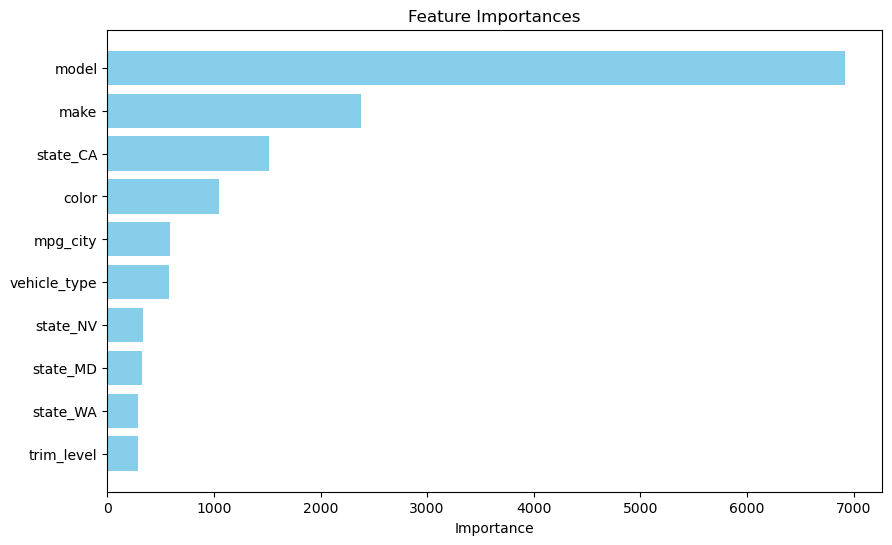

In [40]:
import matplotlib.pyplot as plt

importances = model.get_score(importance_type='gain')

combined_importance = {}
for feature, importance in importances.items():
    original_feature = feature.split('_appraisal')[0]
    if original_feature in combined_importance:
        combined_importance[original_feature] += importance
    else:
        combined_importance[original_feature] = importance

# Convert the combined_importance dictionary to a DataFrame
importance_df = pd.DataFrame(list(combined_importance.items()), columns=['Feature', 'Importance'])

# Sort the DataFrame by importance
importance_df = importance_df.sort_values('Importance', ascending=False)

importance_df = importance_df[0:10]

# Create a bar plot of the feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [41]:
from sklearn.metrics import accuracy_score, f1_score, precision_score

preds_class = [1 if pred > 0.5 else 0 for pred in preds]

accuracy = accuracy_score(y_test, preds_class)
f1_score = f1_score(y_test, preds_class)
precision = precision_score(y_test, preds_class)


accuracy, f1_score, precision

(0.7739612397255109, 0.077834179357022, 0.04204054503157195)

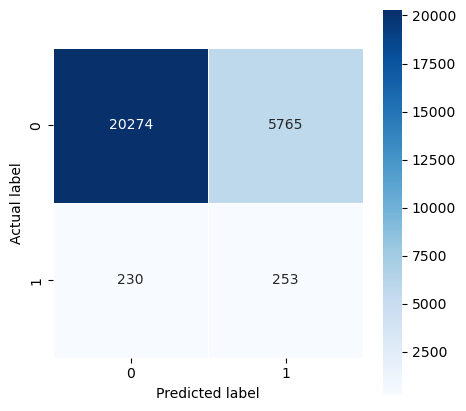

In [42]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate confusion matrix
cm = confusion_matrix(y_test, preds_class)

# Plot confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

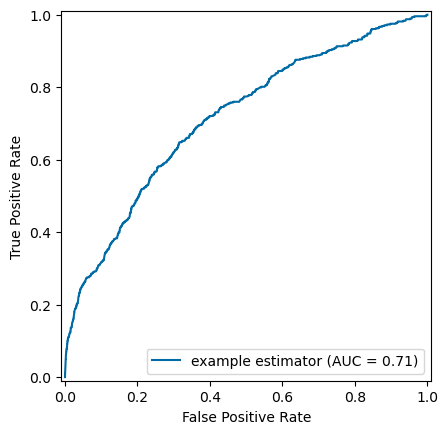

In [43]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name='example estimator')
display.plot()


In [44]:
import math

In [45]:
df_test['preds_floor'] = df_test['preds'].apply(lambda x: math.floor(x*20) / 20)

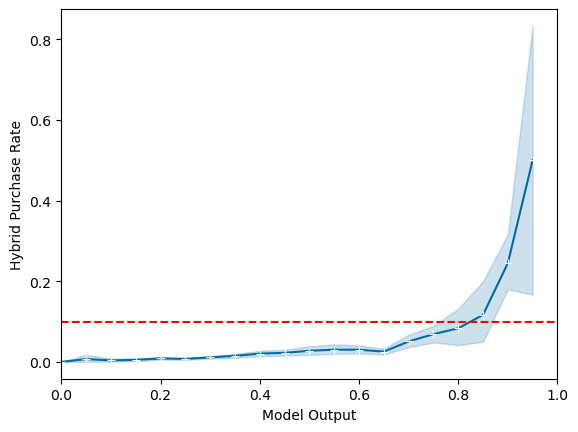

In [46]:
sns.lineplot(df_test, x='preds_floor', y='y_test')

plt.xlim(0, 1)

plt.ylabel('Hybrid Purchase Rate')

plt.axhline(y=0.1, color='red', linestyle='--')

plt.xlabel('Model Output')

plt.show()

### Takeaway: It is hard to be confident on all cars with a model, but we can either send suggested hybrid cars where we are confident and not send cars were were are not confident